# SEIR model

I provide calculations of the SEIR model used in my seminar given in May 2020 (see [the slides](utapseminar2020.pdf) for mode details). As explained in the slides, the SEIR is the following set of differential equations

![SEIR model](img/seir.jpg)

Compared with the SIR model, the `Exposed` state is added, which delays the growth of `Infectious` at the early stage as I will see below.

## Time evolution for a fixed $R_0$

First I fix $R_0=3$, $\beta=0.3$ day$^{-1}$, $\alpha=0.1$ day$^{-1}$, and $\gamma=0.1$ day$^{-1}$, and see the time evolution of `Susceptible`, `Exposed`, `Infectious`, and `Removed`. Initially most people are never infected ($S$) and only 0.01% are exposed ($E$). This can be solved as

Text(0.5, 1.0, 'SEIR model')

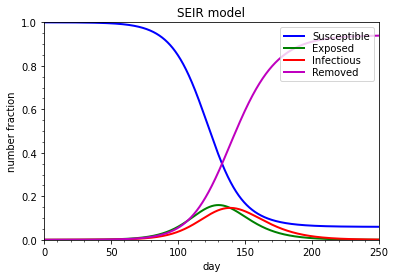

In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint
import matplotlib as mpl
import matplotlib.pyplot as plt

model_name = 'SEIR model'

# differential equations for [x[0], x[1], x[2], x[3]] = [S, E, I, R]
def eqs_seir(x, t, beta, alpha, gamma):
    return [(-1.0) * beta * x[0] * x[2] / (x[0] + x[1] + x[2] + x[3]), \
            beta * x[0] * x[2] / (x[0] + x[1] + x[2] + x[3]) - alpha * x[1], \
            alpha * x[1] - gamma * x[2], \
            gamma * x[2]]

# time step
t_max = 500
dt = 0.01
times = np.arange(0, t_max, dt)

# initial state
S_0 = 9999
E_0 = 1
I_0 = 0
R_0 = 0
ini_state = [S_0, E_0, I_0, R_0] 
N_0 = S_0 + I_0 + R_0

# solve equations using scipy.integrate
args = (0.3, 0.1, 0.1)
result_r3a10 = odeint(eqs_seir, ini_state, times, args)

# plotting
xmin = 0.0
xmax = 250.0
ymin = 0.0
ymax = 1.0

plt.plot(times, result_r3a10[:,0] / N_0, color = 'b', lw = 2)
plt.plot(times, result_r3a10[:,1] / N_0, color = 'g', lw = 2)
plt.plot(times, result_r3a10[:,2] / N_0, color = 'r', lw = 2)
plt.plot(times, result_r3a10[:,3] / N_0, color = 'm', lw = 2)

plt.legend(['Susceptible', 'Exposed', 'Infectious', 'Removed'], labelspacing = 0.2, numpoints = 1, loc = 'upper right')

ax = plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.xlabel('day')
plt.ylabel('number fraction')
plt.title(model_name)

It is seen that most (>90%) people experiences the infection. 

## Dependence on $\alpha$

As discussed in [the slides](utapseminar2020.pdf), $\alpha$ controls the early growth of $I$. To explicitly see this, I change $\alpha$ to $0.05$, $0.1$, and $\alpha=0.2$ ($\alpha'=\alpha/\gamma=0.5$, $1$, and $2$) to see how the results change

Text(0.5, 1.0, 'SEIR model')

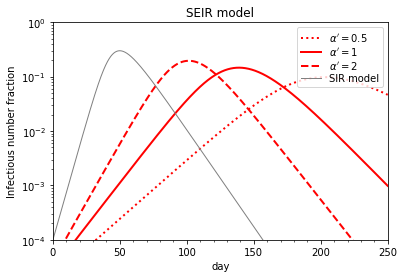

In [2]:
# solve equations using scipy.integrate
args = (0.3, 0.05, 0.1)
result_r3a05 = odeint(eqs_seir, ini_state, times, args)

args = (0.3, 0.2, 0.1)
result_r3a20 = odeint(eqs_seir, ini_state, times, args)

# solve SIR for comparison
def eqs_sir(x, t, beta, gamma):
    return [(-1.0) * beta * x[0] * x[1] / (x[0] + x[1] + x[2]), \
        beta * x[0] * x[1] / (x[0] + x[1] + x[2]) - gamma * x[1], \
        gamma * x[1]]

S_0 = 9999
I_0 = 1
ini_state = [S_0, I_0, R_0] 

args = (0.3, 0.1)
result_r3 = odeint(eqs_sir, ini_state, times, args)

# plotting
ymin = 1.0e-4
ymax = 1.0

plt.plot(times, result_r3a05[:,2] / N_0, ':', color = 'r', lw = 2)
plt.plot(times, result_r3a10[:,2] / N_0, '-', color = 'r', lw = 2)
plt.plot(times, result_r3a20[:,2] / N_0, '--', color = 'r', lw = 2)
plt.plot(times, result_r3[:,1] / N_0, '-', color = 'gray', lw = 1)

plt.legend(['$\\alpha^{\\prime}=0.5$','$\\alpha^{\\prime}=1$','$\\alpha^{\\prime}=2$', 'SIR model'], labelspacing = 0.2, numpoints = 1, loc = 'upper right')

ax = plt.gca()
ax.set_yscale('log')
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.xlabel('day')
plt.ylabel('Infectious number fraction')
plt.title(model_name)

The plot above indicates that slope gets shallower for
smaller $\alpha$. Therefore we can't simply infer $R_0$ from the slope of the early growth if we take the effect of `Exposed` into account.

## Changing $R_0$ with time

The basic reproduction number $R_0$ (note: sometimes it is defined as a value in absence of any deliberate intervention in disease transmission, but here I'm using $R_0$ for reproduction number that can change by environmental conditions) can be reduced by e.g., lockdown and vaccine. Using the SEIR model, I'll see how the change of $R_0$ with time affects the growth of $I$ with time.

First I reduce $R_0$ from $2.5$ to $0.3$ for a fixed time interval, only for once (and start with 0.001% of `Exposed`)

Text(0.5, 1.0, 'SEIR model')

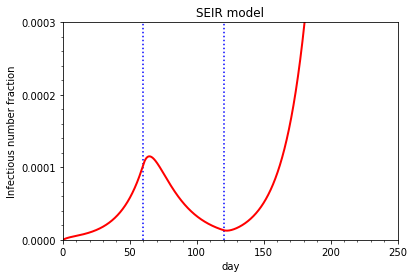

In [3]:
# time step
t_max1 = 60
t_max2 = 120
t_max3 = 300
dt = 0.01

# initial state
S_0 = 99999
E_0 = 1
I_0 = 0
R_0 = 0
ini_state1 = [S_0, E_0, I_0, R_0] 
N_0 = S_0 + I_0 + R_0

# solve equations using scipy.integrate
times1 =np.arange(0, t_max1, dt)
args1 = (0.25, 0.1, 0.1)  # R_0 = 2.5
result1 = odeint(eqs_seir, ini_state1, times1, args1)

ini_state2 = result1[-1:].flatten().tolist()

times2 =np.arange(t_max1, t_max2, dt)
args2  =(0.03, 0.1, 0.1)  # R_0 = 0.3
result2 = odeint(eqs_seir, ini_state2, times2, args2)

ini_state3 = result2[-1:].flatten().tolist()

times3 =np.arange(t_max2, t_max3, dt)
args3  =(0.25, 0.1, 0.1)   # R_0 = 2.5
result3 = odeint(eqs_seir, ini_state3, times3, args3)

times_all = np.hstack((times1, times2, times3))
result_all = np.vstack((result1, result2, result3))

# plotting
ymin = 0.0
ymax = 3.0e-4

plt.vlines(x = [t_max1, t_max2], ymin = ymin, ymax = ymax, color = 'b', linestyle = 'dotted')

plt.plot(times_all, result_all[:,2] / N_0, '-', color = 'r', lw = 2)

ax = plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.0001))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.00002))

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.xlabel('day')
plt.ylabel('Infectious number fraction')
plt.title(model_name)

The vertical dotted lines show the time when $R_0$ is changed. By reducing $R_0$ to $0.3$, $I$ can be reduced significantly, but when $R_0$ goes back to $2.5$ $I$ quickly recovers. 

For a slightly modified version, I consider the change of $R_0$ from $2.5$ to $0.3$, and $0.3$ to $1.5$

Text(0.5, 1.0, 'SEIR model')

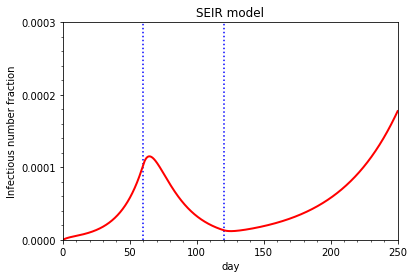

In [4]:
# solve equations using scipy.integrate
times3 =np.arange(t_max2, t_max3, dt)
args3  =(0.15, 0.1, 0.1)   # R_0 = 1.5
result3 = odeint(eqs_seir, ini_state3, times3, args3)

times_all = np.hstack((times1, times2, times3))
result_all = np.vstack((result1, result2, result3))

# plotting
plt.vlines(x = [t_max1, t_max2], ymin = ymin, ymax = ymax, color = 'b', linestyle = 'dotted')

plt.plot(times_all, result_all[:,2] / N_0, '-', color = 'r', lw = 2)

ax = plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.0001))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.00002))

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.xlabel('day')
plt.ylabel('Infectious number fraction')
plt.title(model_name)

Although it delays the growth of $I$ but it keeps increasing anyway. 

So a plausible scenario might be that we repeatedly have time intervals with small $R_0$ to keep $I$ sufficiently small

Text(0.5, 1.0, 'SEIR model')

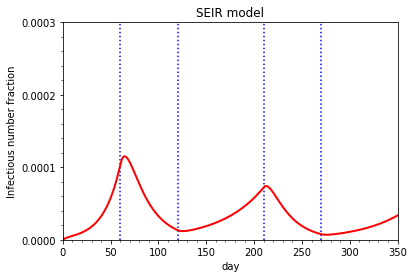

In [5]:
# time step
t_max1 = 60
t_max2 = 120
t_max3 = 210
t_max4 = 270
t_max5 = 400
dt = 0.01

ini_state3 = result2[-1:].flatten().tolist()

times3 =np.arange(t_max2, t_max3, dt)
args3  =(0.15, 0.1, 0.1)   # R_0 = 1.5
result3 = odeint(eqs_seir, ini_state3, times3, args3)

ini_state4 = result3[-1:].flatten().tolist()

times4 =np.arange(t_max3, t_max4, dt)
args4  =(0.03, 0.1, 0.1)   # R_0 = 0.03
result4 = odeint(eqs_seir, ini_state4, times4, args4)

ini_state5 = result4[-1:].flatten().tolist()

times5 =np.arange(t_max4, t_max5, dt)
args5  =(0.15, 0.1, 0.1)   # R_0 = 1.5
result5 = odeint(eqs_seir, ini_state5, times5, args5)

times_all = np.hstack((times1, times2, times3, times4, times5))
result_all = np.vstack((result1, result2, result3, result4, result5))

# plotting
xmin = 0.0
xmax = 350.0

plt.vlines(x = [t_max1, t_max2, t_max3, t_max4], ymin = ymin, ymax = ymax, color = 'b', linestyle = 'dotted')

plt.plot(times_all, result_all[:,2] / N_0, '-', color = 'r', lw = 2)

ax = plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.0001))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.00002))

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.xlabel('day')
plt.ylabel('Infectious number fraction')
plt.title(model_name)

I made this kind of ''prediction'' in May 2020 when we were seeing only the first peak (at least in Japan), and fortunately for unfortunately we are indeed seeing multiple peaks of $I$ through early 2021.